<a href="https://colab.research.google.com/github/aseddin/F22_ECE4715/blob/main/MNIST_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project Checklist

1. Get the data
2. Look at the data to gain insights
3. Preprocess the data to and make it ready for machine learning algorithms
4. Explore many different models and shortlist the best ones
5. Fine-tune your models and combine them into a great solution



In [ ]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# figure saving function
from pathlib import Path
IMAGES_PATH = Path() / "images" / "MNIST_playground"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Get the data 

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# The data is already split into train/test

X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

# 2. Look at the data to gain insights


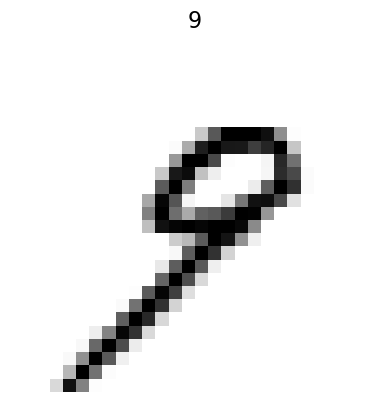

In [ ]:
def plot_digit(image_data, label=None):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")
  if label is not None:
    plt.title(label, fontsize=16)

digit_index = 501
some_digit = X_train[digit_index]
digit_class = y_train[digit_index]
plot_digit(some_digit, digit_class)

/tmp/ipykernel_15971/1683121530.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, columns, i + 1)


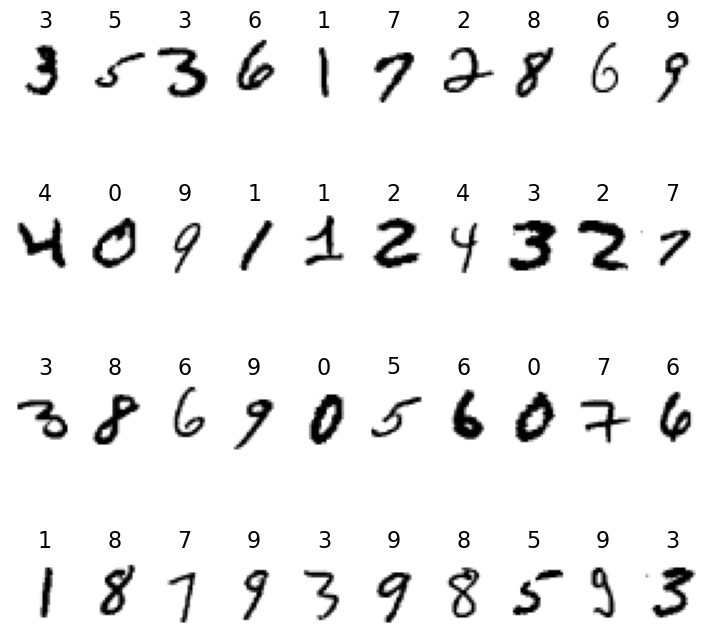

In [ ]:
# you will get an error if the number of rows and the number of images are not 
# divisable by each other
# this issue needs to be fixed when there is time
# Anyhow, the purpose of this function is to look at different images along with
# there class labels or predictions

def plot_several_digits(images_data, rows, labels=None):
  image_count = len(images_data)
  columns = image_count / rows
  plt.figure(figsize=(9, 9))
  plt.subplots_adjust(wspace=0, hspace=0)

  if labels is not None:
    assert len(labels) == image_count
    for i in range(image_count):
      plt.subplot(rows, columns, i + 1)
      plot_digit(images_data[i], labels[i])
  else:
    for i in range(image_count):
      plt.subplot(rows, columns, i + 1)
      plot_digit(images_data[i])


plot_several_digits(X_train[10:50, :], rows=4, labels=y_train[10:50])

In [ ]:
s = pd.Series(X_train[1,:])
s.describe()

count    784.000000
mean      39.661990
std       83.940709
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
dtype: float64

In [ ]:
s.unique()

array([  0.,  51., 159., 253.,  50.,  48., 238., 252., 237.,  54., 227.,
       239., 233.,  57.,   6.,  10.,  60., 224., 202.,  84., 122., 163.,
        96., 189., 167., 190., 114., 228.,  47.,  79., 255., 168., 179.,
        12.,  75., 121.,  21., 243.,  38., 165., 208.,   7., 178., 240.,
        71.,  19.,  28., 195.,  63., 198., 196.,  76., 246., 112., 148.,
        85., 230.,  25., 135., 186., 223., 131., 225., 145., 173.,  86.,
       162., 249., 146.,  29.,  56., 229., 215., 130., 199., 128., 141.,
        37.])

# 3. Preprocess the data to and make it ready for machine learning algorithms

The data is already preprocssed; however, we might want to binarize the image data

In [ ]:
from sklearn.preprocessing import Binarizer

X_train_binarized = Binarizer(threshold = 128).fit_transform(X_train)
X_test_binarized = Binarizer(threshold = 128).fit_transform(X_test)

# 4. Explore many different models and shortlist the best ones

Look at this [flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for a rough guide on how to approach a problem.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
qda_clf.score(X_train, y_train)

/home/asalaheddin/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.5858833333333333

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb_clf = BernoulliNB()
bnb_clf.fit(X_train_binarized, y_train)
bnb_clf.score(X_train_binarized, y_train)

0.8362666666666667

In [ ]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC()
svc_clf.fit(X_train_binarized, y_train)
svc_clf.score(X_train_binarized, y_train)

/home/asalaheddin/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.92095

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_clf, X_train_binarized, y_train, cv=4, n_jobs=-1)

In [ ]:
scores

array([0.90246667, 0.90493333, 0.89733333, 0.9108    ])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(n_jobs=-1)
sgd_clf.fit(X_train_binarized, y_train)
sgd_clf.score(X_train_binarized, y_train)

0.9157

In [ ]:
scores = cross_val_score(sgd_clf, X_train_binarized, y_train, cv=4, n_jobs=-1)

In [ ]:
scores

array([0.90366667, 0.90713333, 0.8942    , 0.90806667])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_binarized, y_train)
kn_clf.score(X_train_binarized, y_train)

0.97365

In [ ]:
scores = cross_val_score(kn_clf, X_train_binarized, y_train, cv=4, n_jobs=-1)

In [ ]:
scores

array([0.95546667, 0.9564    , 0.95266667, 0.95673333])

KNeighborsClassifier seems to be the most promissing

# 5. Fine-tune your models and combine them into a great solution


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights': ('uniform', 'distance'),
    'n_neighbors': [2, 4]
}
grid_search = GridSearchCV(kn_clf, param_grid, cv=4, n_jobs=-1)
grid_search.fit(X_train_binarized, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4],
                         'weights': ('uniform', 'distance')})

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9594

In [ ]:
clf = grid_search.best_estimator_

In [ ]:
clf.fit(X_train_binarized, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
scores = cross_val_score(clf, X_train_binarized, y_train, cv=5, n_jobs=-1)

In [ ]:
scores

array([0.96183333, 0.96116667, 0.95775   , 0.95891667, 0.96083333])

In [ ]:
scores.mean()

0.9601

In [ ]:
clf.score(X_train_binarized, y_train)

1.0

It seems that it overfit the training data. Let's take a look at what errors are being made

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train_binarized, y_train, cv=5, n_jobs=-1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5870,    5,    7,    0,    3,    8,   18,    5,    3,    4],
       [   0, 6714,    9,    2,    1,    1,    2,   10,    1,    2],
       [  54,   97, 5611,   23,    6,    7,   15,  121,   17,    7],
       [   9,   24,   32, 5857,    3,   73,    6,   58,   37,   32],
       [   5,   77,    3,    1, 5581,    1,   18,   24,    2,  130],
       [  13,   24,    3,   82,   11, 5182,   61,    9,   11,   25],
       [  29,   15,    1,    1,    6,   20, 5844,    0,    2,    0],
       [   4,   96,   12,    2,   10,    1,    0, 6076,    3,   61],
       [  29,  138,   27,  111,   35,  130,   39,   29, 5226,   87],
       [  20,   20,    4,   39,   80,   15,    2,  114,   10, 5645]])

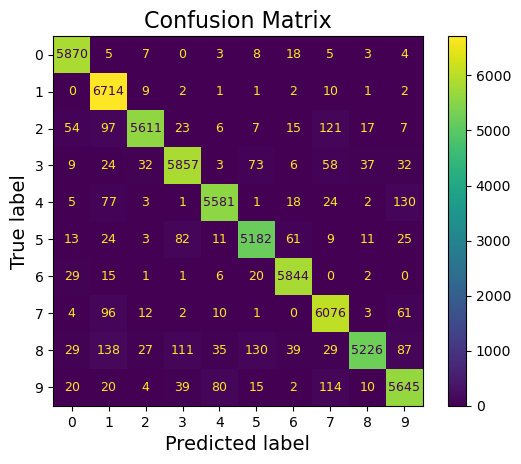

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

Let's normalize by the rows to see where the errors are

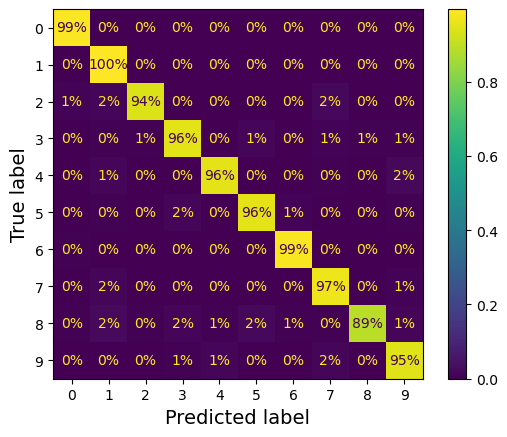

In [ ]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")

8 seems to be the one causing the lower scores. 

In [ ]:
misclassified = X_train_binarized[y_train != y_train_pred, :]
misclassified.shape

(2394, 784)

Let's look at some of  these misclassified digits

/tmp/ipykernel_15971/1683121530.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, columns, i + 1)


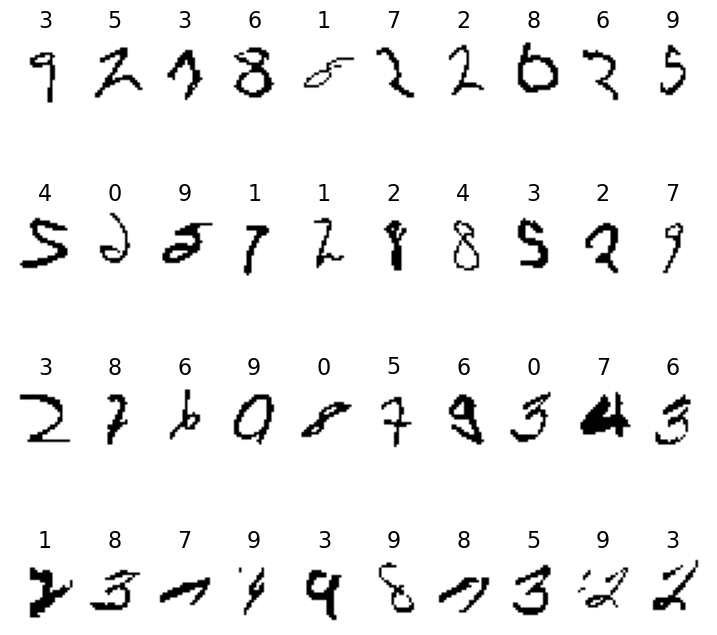

In [ ]:
plot_several_digits(misclassified[10:50, :], rows=4, labels=y_train_pred[10:50])
plt.show()

Let's see the performance on the test set

In [ ]:
clf.score(X_test_binarized, y_test)

0.9598